In [2]:
import pandas as pd

churn_data = pd.read_csv('churn.csv')#читаю файл, удаляю ненужный столбец
churn_data.drop(columns = ['RowNumber'], axis = 1)
#вывожу таблицу для удобства восприятия информации


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Задание 9.1. 
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

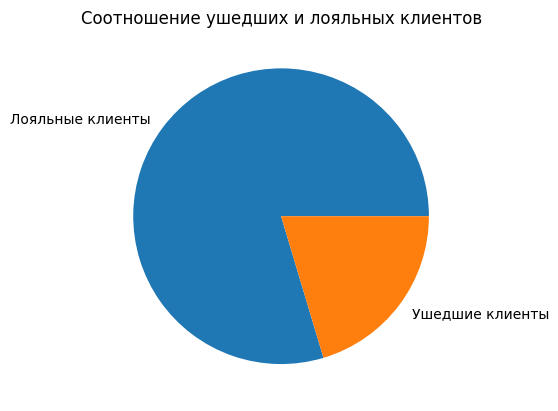

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

churn_data = pd.read_csv('churn.csv')#читаю файл, удаляю ненужный столбец
#churn_data.drop(columns = ['RowNumber'], axis = 1)

exited = churn_data.groupby('Exited')['Exited'].count() #группирую клиентов по признаку лояльности
exited2 = churn_data['Exited'].count()
fig, ax = plt.subplots()
ax.pie(exited, labels= ['Лояльные клиенты', 'Ушедшие клиенты']) #создаю диаграмму
ax.set_title('Соотношение ушедших и лояльных клиентов') #подписываю график

In [7]:
churn_data['Exited'].value_counts()


#Exited
#0    7963
#1    2037

0    7963
1    2037
Name: Exited, dtype: int64

Ответ.

Я выбрала круговую диаграмму, тк она нагляднее всего показывает соотношение долей.
Из диаграммы хорошо видно, что соотношение ушедших и лояльных клиентов 20/80 (если точнее 20,4% на 79,6%)

Задание 9.2.
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

Text(0.5, 0, 'Баланс пользователей, в долларах')

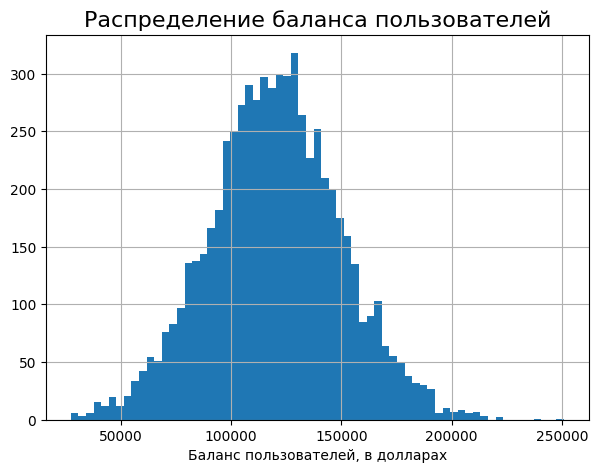

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

churn_data = pd.read_csv('churn.csv')#читаю файл, удаляю ненужный столбец
churn_data.drop(columns = ['RowNumber'], axis = 1)

balance_data = churn_data[churn_data['Balance'] > 25000] #фильтрую по балансу
balance_grouped = balance_data['Balance'] #выбираю только столбец баланс
balance_axes = balance_grouped.hist(figsize=(7, 5), bins=65) #формирую гистограмму

balance_axes.set_title('Распределение баланса пользователей', fontsize=16)#подписываю график и оси
balance_axes.set_xlabel('Баланс пользователей, в долларах')


Ответ.

В качестве графика я выбрала гистограмму, тк она предназначена для визуализации распределения значений.
Из гистограммы видно, что за период наблюдений большая часть клиентов имеет баланс от 100 000 до 140 000 долларов. На эту группу клиентов банку необходимо обращать внимание и поддерживать их лояльность.

Задание 9.3. 

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Text(0.5, 1.0, 'баланс от 0')

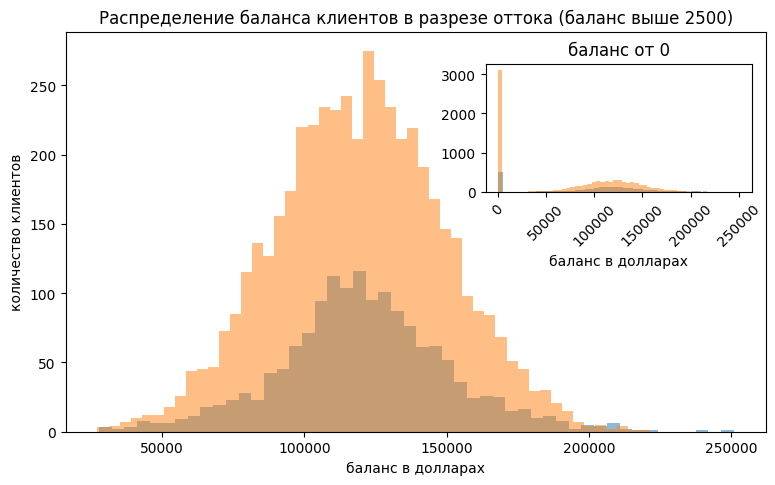

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

churn_data = pd.read_csv('churn.csv')#читаю файл, удаляю ненужный столбец
churn_data.drop(columns = ['RowNumber'], axis = 1)

#хочу посмотреть распределение от 2500 долларов и от 0. Сначала построю от 2500
balance_outflow2 = churn_data.copy()

balance_outflow = churn_data[churn_data['Balance'] > 25000] #фильтрую по балансу
outflow_1 = balance_outflow[balance_outflow['Exited'] == 1] #таблица с ушедшими клиентами
outflow_0 = balance_outflow[balance_outflow['Exited'] == 0] #таблица с лояльными клиентами
#строю двойную гистограмму для баланса лояльных и ушедших клиентов с фильтрацией баланса
fig = plt.figure(figsize=(7, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(outflow_1['Balance'], bins = 50, alpha = 0.5, label='Лояльные клиенты' )
main_axes.hist(outflow_0['Balance'], bins = 50, alpha = 0.5, label='Ушедшие клиенты' )
main_axes.set_title('Распределение баланса клиентов в разрезе оттока (баланс выше 2500)')#подписываю график и оси
main_axes.set_xlabel('баланс в долларах')
main_axes.set_ylabel('количество клиентов')

outflow_1_1 = balance_outflow2[balance_outflow2['Exited'] == 1] #таблица с ушедшими клиентами (без фильтрации баланса)
outflow_0_1 = balance_outflow2[balance_outflow2['Exited'] == 0] #таблица с лояльными клиентами (без фильтрации баланса)
#строю двойную гистограмму для баланса лояльных и ушедших клиентов без фильтрации баланса
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.32])
insert_axes.hist(outflow_1_1['Balance'], bins = 50, alpha = 0.5)
insert_axes.hist(outflow_0_1['Balance'], bins = 50, alpha = 0.5)
insert_axes.xaxis.set_tick_params(rotation=45)
insert_axes.set_xlabel('баланс в долларах')#подписываю график и оси
insert_axes.set_title('баланс от 0')

Ответ.

На основной гистограмме видно, что распределение балансов лояльных и ушедших клиентов примерно одинаковое, от 100 000 до 140 000 долларов. Решила сначала рассмотреть поближе клиентов с балансом от 2500 долларов, как в предыдущем задании, чтобы как бы масштабировать данные. 
Разницу я увидела только лишь в количестве самих клиентов, но не в распределении балансов. 
А вот ситуация на дополнительной гистограмме интереснее (там изображены все клиенты банка). Лояльных клиентов, не имеющих на счету денег более 3000, когда как ушедших с нулевым балансом - 500. Это интересные данные. Отток клиентов с нулевым балансом очень высок. 500 человек, это почти в 5 раз выше, чем максимальные пики с положительным балансом.
Есть исключения ("пеньки") ближе к 250 000 долларов, эти клиенты тоже ушли из банка.
Я бы рекомендовала обратить особое внимение на лояльных клиентов с нулевым балансом. Они, по моему мнению, в явной группе риска оттока.

Задание 9.4. 

Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

0.12.2


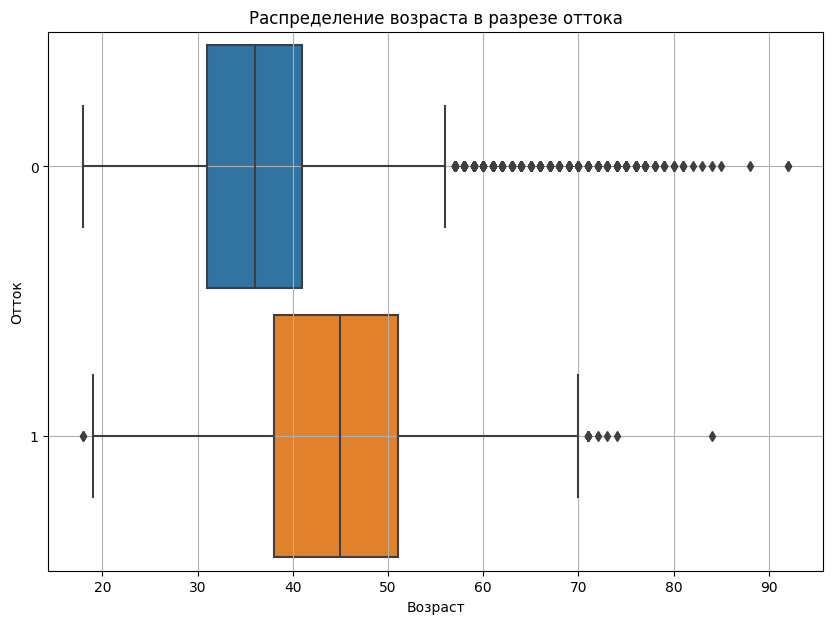

In [8]:
import seaborn as sns
print(sns.__version__)

churn_data = pd.read_csv('churn.csv')#читаю файл, удаляю ненужный столбец
churn_data.drop(columns = ['RowNumber'], axis = 1)

fig_box = plt.figure(figsize=(10, 7))#строю график распределения возраста в разрезе оттока
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение возраста в разрезе оттока'), #подписываю график и оси
boxplot.set_xlabel('Возраст'),
boxplot.set_ylabel('Отток'),
boxplot.grid()

Ответ.

Медиана ушедших клиентов на 10 лет "старше", чем у лояльных. И в целом, ярко видно смещение по возрасту между лояльными и ушедшими клиентами. Банку необходимо обратить особое внимание на возраст клиентов от 38 до 51 года, это группа риска. 
Выбросов явно больше в группе лояльных клиентов.

Задание 9.5.

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

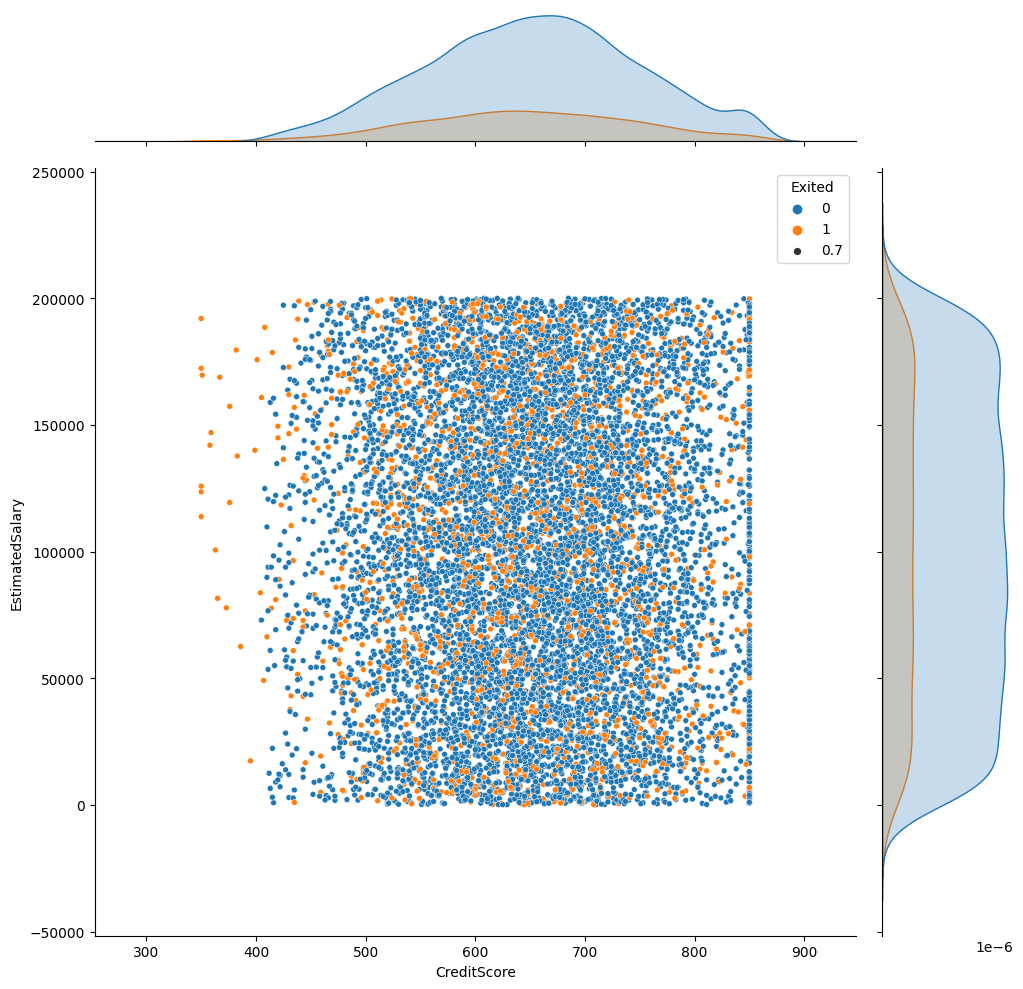

In [9]:
import pandas as pd
import seaborn as sns

churn_data = pd.read_csv('churn.csv')#читаю файл, удаляю лишний столбец
churn_data.drop(columns = ['RowNumber'], axis = 1)

credit_score_ds = churn_data.copy()
#создаю график. Точки на пересечении осей кредитного рейтинга и предполагаемой зп. Цвет точек - лояльность клиента
credit_score = sns.jointplot(
    data= credit_score_ds, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    height=10,
    size= 0.7    
)


Ответ.

Самые низкие кредитные рейтинги имеют несколько ушедших клиентов с высоким и средним доходом. Плотность точек в районе рейтинга 780-830 чуть менее выражена, клиентов с таким рейтингом просто меньше. Но и ниже рейтинга 500 точки тоже начинают рассеиваться, это значит, что рейтинг ниже 500 встречается среди клиентов банка намного реже.
В остальном, я не вижу явной взаимосвязи показателей друг с другом. Точки расположены достаточно равномерно по всему графику. Лояльность клиентов тоже равномерно распределена.

Задание 9.6. 

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [10]:
import pandas as pd
import plotly
import plotly.express as px

churn_data = pd.read_csv('churn.csv')#читаю файл, удаляю лишний столбец
churn_data.drop(columns = ['RowNumber'], axis = 1)

#группирую таблицу по полу, беру средние данные по ушедшим клиентам (долю)
exited_data = churn_data.groupby(
    by='Gender',
    as_index=False
)[['Exited']].mean().round(2)

#строю график, показывающий какой процент оттока у обоих полов
fig_gender = px.bar(
    data_frame=exited_data, 
    x="Gender",  
    y="Exited", 
    labels = {'Female':'Женщины', 'Male': 'Мужчины'},
    color='Gender', 
    text = 'Exited', 
    orientation='v', 
    height=500, 
    width=400, 
    title='Отток клиентов по признаку пола')
    
fig_gender.show()

Ответ.

Основываясь на данных графика, среди женщин отток выше. Четверь всех клиентов женского пола покинули банк.
Среди мужчин данные ниже, они покидают банк в 16% случаев.

Задание 9.7. 

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

Text(0.5, 1.0, 'Зависимость лояльности от приобретенных услуг')

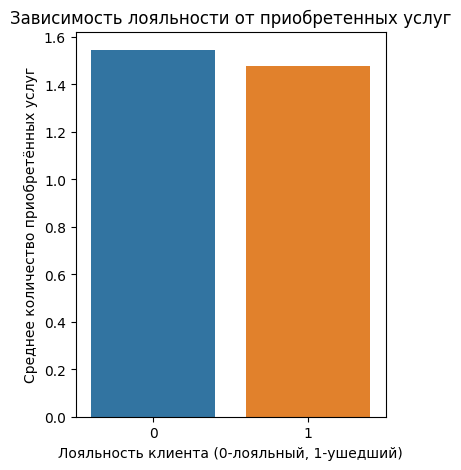

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

churn_data = pd.read_csv('churn.csv')#читаю файл, удаляю лишний столбец
churn_data.drop(columns = ['RowNumber'], axis = 1)

extited_product_df = churn_data.copy()
fig_9_7 = plt.figure(figsize=(4, 5))#строю столбчатую диаграмму со средним количеством услуг для лояльных и ушедших клиентов
extited_product = sns.barplot(
    data=extited_product_df,
    x='Exited',
    y='NumOfProducts',
    errorbar=None
)
extited_product.set_ylabel('Среднее количество приобретённых услуг')#подписываю график и оси
extited_product.set_xlabel('Лояльность клиента (0-лояльный, 1-ушедший)')
extited_product.set_title('Зависимость лояльности от приобретенных услуг')

Ответ.

Ушедшие клиенты, на момент ухода, приобрели чуть меньше услуг банка, чем лояльные. У лояльного клиента в среднем 1.54 единицы услуг, а у ушедшего 1.47.
Это вполне объяснимо, лояльные клиенты довольны услугами банка и покупают ещё.

Задание 9.8. 

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Text(0.5, 1.0, 'Зависимость лояльности от статуса активного клиента')

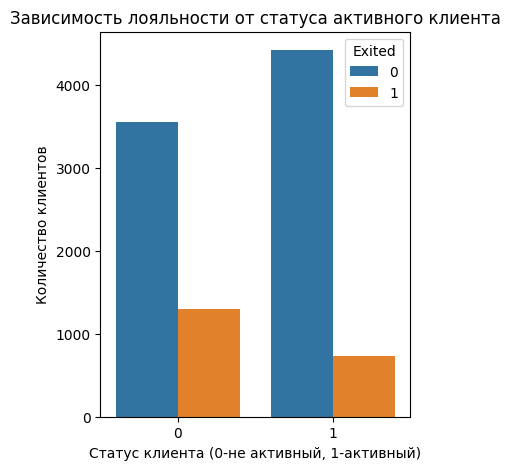

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

churn_data = pd.read_csv('churn.csv')#читаю файл, удаляю лишний столбец
churn_data.drop(columns = ['RowNumber'], axis = 1)

extited_active_df = churn_data.copy()
extited_active_df.groupby('Exited')['IsActiveMember'].count()#группирую по признаку лояльности и статусу активного клиента

fig = plt.figure(figsize=(4, 5))#строю график, показывающий влияние статуса активности на отток
extited_product = sns.barplot(
    data=extited_active_df,
    x='IsActiveMember',
    y='IsActiveMember',
    hue='Exited',
    errorbar=None,
    estimator = 'count'
)
extited_product.set_ylabel('Количество клиентов')#подписываю график и оси
extited_product.set_xlabel('Статус клиента (0-не активный, 1-активный)')
extited_product.set_title('Зависимость лояльности от статуса активного клиента')


Ответ.

Отток активных клиентов практически в 2 раза ниже, чем отток не активных. Это говорит о том, что не активных пользователей не привлекают дополнительной рекламой услуг банка, не делают им предложений по продуктам банка. Они просто зашли в базу клиентов, не совершили никаких действий (покупок продуктов банка, вкладов и тд) и покинули банк. 
На стадии "вхождения" клиента в базу банка, я бы рекомендовала делать ему предложения по продуктам, которые его могли бы заинтересовать. Возможно, давать более выгодные условия для новых клиентов банка. А так же, хорошо было бы запрашивать у таких клиентов обратную связь о причинах ухода.
Интересно, что оставшихся не активных клиентов в абсолюте очень много более 3,5 тысяч. С такими клиентами нужно вести работу по базе данных, предлагая им продукты банка по их потребностям.

Задание 9.9. 

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [13]:
import pandas as pd
import plotly
import plotly.express as px
import numpy as np

churn_data = pd.read_csv('churn.csv')#читаю файл, удаляю лишний столбец
churn_data.drop(columns = ['RowNumber'], axis = 1)

extited_map = churn_data.copy()
extited_map_df = extited_map.groupby(by='Geography',as_index=False)['Exited', 'CustomerId'].agg({'Exited': 'sum', 'CustomerId': 'count'})
#Группирую по странам в разрезе лояльности, добавляю столбец с ID клиента, чтобы впоследствии посчитать общее кол-во
extited_map_df.rename(columns=({'CustomerId': 'Clients'}), inplace=True)#переименовываю столбец для наглядности
extited_map_df['ex_percent'] = ((extited_map_df['Exited']/extited_map_df['Clients'])*100).round(1)
#добавляю столбец с процентом ушедших клиентов

fig_map = px.choropleth(#строю график
    data_frame=extited_map_df, 
    locations="Geography", 
    locationmode = "country names", 
    color= 'ex_percent', 
    range_color=[0, 40], 
    title='Количество ушедших клиентов в разрезе стран', 
    width=800, 
    height=500,
    color_continuous_scale='Blues',       
    fitbounds='locations',
    scope='europe',
)
fig_map.add_scattergeo(#настраиваю информативность графика
    locations = extited_map_df.Geography,
    locationmode = "country names",
    customdata = np.stack((extited_map_df.Clients, extited_map_df.ex_percent), axis=-1), 
    text = extited_map_df.Geography,
    texttemplate='<b style="color: #3C0048; font-size:12px;">%{text}</b>'
                 '<br>%{customdata[0]}'
                 '<br>%{customdata[1]}%',
    hoverinfo = 'skip', 
    mode = 'text'
)
fig_map.show()

C:\Users\Администратор\AppData\Local\Temp\ipykernel_12552\454253254.py:10: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Ответ.

Я построила картограмму, которая дала мне понять, что из Франции и Германии ушло практически одинаковое количество клиентов в абсолюте, а в Испании ушло в 2 раза меньше клиентов, чем в каждой из других стран. 
Общее количество клиентов говорит мне, что предположительно банк французский, тк половина всех клиентов банка из Франции. 
Отток французов - 16%, отток испанцев - 16%.
А жители Германии, уходят в 32% случаев.
Могу предположить, что тут повлияли условия банковских продуктов именно для жителей Германии. Возможно, они получают меньше процент по вкладам или имеют другие условия, которые, именно для жителей Германии, более выгодны в других банках.

Задание 9.10. 

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Text(0.5, 23.52222222222222, 'Сколько лет клиенты пользуются услугами')

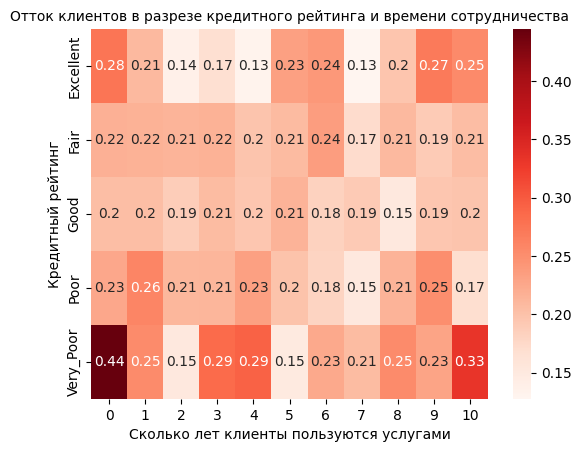

In [14]:
import pandas as pd
import seaborn as sns

churn_data = pd.read_csv('churn.csv')#загружаю таблицу
churn_data.drop(columns = ['RowNumber'], axis = 1)#убираю лишний столбец
credit_score_df = churn_data.copy()#делаю копию таблицы
credit_score_df['CreditScoreCat'] = credit_score_df['CreditScore'].copy()#добавляю столбец для категорий кредитного рейтинга

def get_credit_score_cat(credit_score):#функция, для определения категорий
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
credit_score_df['CreditScoreCat'] = credit_score_df['CreditScoreCat'].apply(get_credit_score_cat)#применяю функцию

c_s_pivot = credit_score_df.pivot_table(values = 'Exited', index = 'CreditScoreCat', columns = 'Tenure', aggfunc= 'mean')#создаю сводную таблицу

heatmap = sns.heatmap(data=c_s_pivot, cmap='Reds', annot= True, fmt='.2g')#создаю и офорляю график
heatmap.set_title('Отток клиентов в разрезе кредитного рейтинга и времени сотрудничества', fontsize=10)
heatmap.set_ylabel('Кредитный рейтинг')
heatmap.set_xlabel('Сколько лет клиенты пользуются услугами')




Ответ

На диаграмме сразу бросается в глаза нижняя левая ячейка. Это Клиенты, с очень плохим рейтингом и не задержавшиеся у нас в банке ни одного года.
Могу предположить, что это люди, которые захотели купить кредитные продукты, но из-за плохого рейтинга, сам банк им отказал. И дальнейшее сотрудничество сразу сошло на нет. Не вижу смысла анализировать данный факт, банк хочет заработать денег, а клиенты, не выплачивающие свои кредиты, ему вряд ли в этом помогут.
В целом, клиенты в низким рейтингом в 6 из 10 случаев показывают процент оттока 25% и выше. Это группа риска для банка. Их можно привлекать только дебетовыми продуктами, что довольно сложно из-за их плохой платёжеспособности (основываясь на рейтинге).
Более интересны другие данные. Следующая по интенсивности окраски (после всей группы очень плохого рейтинга) -  левая верхняя ячейка, это клиенты с самым высоким рейтингом, но при этом, являющиеся клиентами банка 0 лет. Очень показательно. Данные клиенты могут платить, но не выбирают продукты банка. Я рекомендовала бы обратить особое внимание на этих клиентов и вернуться к ним с другими продуктами банка, или с другими условиями.
Клиенты,имеющие идеальный рейтинг, и пользующиеся продуктами банка 5, 6, 8 лет, на мой взгляд, тоже должны быть тщательно изучены. Эти люди могут покупать продукты банка, нам только лишь нужно им предложить подходящий продукт. Клиенты, пробывшие с банком 9 и 10 лет, с отличным рейтингом и уходящие в 25-27% случаев это явная недоработка с со старыми лояльными клиентами. Возможно, банк про таких забывает. Люди взрослеют/стареют/у них меняется жизнь, им нужны уже другие условия и предложения. С ними банк работает плохо.
Но зато отчётливо видно, что клиенты с идеальным рейтингом либо уходят в первый год, либо только на пятый год. Тут нужен анализ клиентов и предложений для них в этот временной период. Нужно понимать, что их устраивает на протяжении 3х лет, но на 5 год перестаёт устраивать.
